# Ancient texts: Exploratory Data Analysis (EDA) and preparation
#### This notebook contains
* the scraped catalog with inserted texts
* initial investigations
* initial visuals
* initial transformation and wrangling of data set for further more in-depth analyses

### Data
As stated in the read_me, the data set used in these notebooks was scraped from the Electronic Corpus of Sumerian Literature website (ETCSL)
* first, the catalog without texts was scraped using Beautiful Soup, cleaned, and transformed into a working data frame
* then, a py script was written in order to scrape the translated texts (`Texts`) in batches according to genre (`B_Category`)
* finally, all batches of texts were transformation and then merged into the df loaded here

### Contents
The loaded df has 555 observations with 12 features\
Snippet:

|Index| A_Category| B_Category| Period | Dynasty | God  | 2nd_god | Other_divine | Person | Number | Composition | Place | Text |
|-----|------|-----------|--------|---------|------|---------|--------------|--------|--------|------------|--------|------------|
|97| Compositions |Royal praise|Ur III |Third    |NaN| NaN     |  NaN       |Shulgi  |2.4.2.16|  A praise.. |  NaN|  | 
|98| Compositions   |   Royal praise    | Ur III |Third|   Utu      | NaN |NaN| Shulgi | 2.4.2.17      |  An adab (?) |  NaN|  |
|99|Compositions|   Royal praise     |  Ur III  |   Third   |   Ninlil   |NaN|Barge |Shulgi       | 2.4.2.18 |  a tigi (?) |  NaN| |         

The contents of the features maintain the original divisions, allocations, and numbers given by ETCSL
* `A_Category` and `B_Category` designations hold true to the original catalog
  * `A_Category` is a broad category to which a text is assigned
  * `B_Category` is a more specific genre to which a text is assigned
* `Period` and `Dynasty` are the periods and dynasties during which, if given, a text may purport to have been written
* `Number` is the original ETCSL catalog number of a text
* `Composition` is the original ETCSL catalog title (generally modern) given to a text
* `Text` is the original translated text as scraped 

*Differences*:
* A god was assigned to a text if their name was originally assigned, if their name is in the text title, or if it is known that they feature prominently in the text
  * Gods were generally not assigned to letters, dialogues, law codes, lists, or proverbs even if they may appear in said texts
  * The name 'gods' was assigned if it is known that the text features a pantheon of gods
  * The divine pair Inana and Dumuzi were given their own `God` label in the original catalog
  * The god Nana-Suen (the moon) can be referred to as Nana, Suen, or Nana-Suen. The original catalog has three `God` labels for this, arguably, single god
* The feature `2nd_god` is newly created and was assigned only if a 2nd god is known to also be featured in a text
  * The assignment of 2nd god is somewhat arbitrary in that some texts feature multiple gods and it is arguable which god should take 2nd billing 
* The feature `Other_divine` is a case similar to `2nd_god`
  * `Other_divine` can include metals, barges, temples...
* The feature `Person` generally aligns with the featured person in a text
  * The person can a king, legendary, or semi-divine being
  * In the case of 2 or more featured persons, it is somewhat arbitrary which person was chosen
* Place is only given in rare cases when a city-state is featured

The df contains 7 broad categories (`A_Category`) to which texts are assigned: 
>Ancient literary catalogues\
>Narrative and mythological compositions\
>Compositions with a historical background and royal praise poetry\
>Literary letters, letter-prayers and laws\
>Hymns and cult songs\
>Other literature\
>Proverbs and proverb collections

The df contains 27 subcategories (`B_Category`) to which texts are assigned

All translations are copyrighted:
© Copyright 2003, 2004, 2005, 2006 The ETCSL project, Faculty of Oriental Studies, University of Oxford Updated 2006-12-19 by JE

### Steps within notebook
* get basic statistics
  * focus on genres (`B_Category`) and gods 
* create some basic visuals
* tidy
  * check for null rows
  * check for duplicates
  * sync columns names
  * remove trailing white space from columns
  * remove trailing white space from string entries
  * investigate and remove copyright only rows
* get some updated statistics

In [20]:
# Import basic packages
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Set grid for all plots
sns.set(style='whitegrid')

In [21]:
df0 = pd.read_csv('cat_with_ALL_texts.csv')
df0.head(2)

,A_Category,B_Category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Composition,Place,Text
0,Ancient literary catalogues,NaN,Ur III,Ur III,NaN,NaN,NaN,NaN,0.1.1,Ur III catalogue from Nibru (N1),Nibru,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."
1,Ancient literary catalogues,NaN,Ur III,Ur III,NaN,NaN,NaN,NaN,0.1.2,Ur III catalogue at Yale (Y1),NaN,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."


In [22]:
# Get basic contents
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   A_Category    555 non-null    object
 1   B_Category    540 non-null    object
 2   Period        228 non-null    object
 3   Dynasty       228 non-null    object
 4   God           310 non-null    object
 5   2nd_god       10 non-null     object
 6   Other_divine  35 non-null     object
 7   Person        272 non-null    object
 8   Number        555 non-null    object
 9   Composition   555 non-null    object
 10  Place         39 non-null     object
 11  Text          555 non-null    object
dtypes: object(12)
memory usage: 52.2+ KB


In [23]:
# Get names of gods in 'God'
df0.God.unique()

array([nan, 'Enki', 'Enlil', 'Inana', 'Inana and Dumuzid', 'Nanna-Suen',
       'Ninurta', 'Martu', 'Ningishzida', 'Gods', 'Pabilsag', 'Damu',
       'Bau', 'Nanna', 'Utu', 'Ninlil', 'Nergal', 'An', 'Suen',
       'Meshlamta-ea', 'Kindattu', 'Nanaya', 'Ninisina', 'Nisaba',
       'Ninshubur', 'Ninsiana', 'Ningublaga', 'Nuska', 'Dagan', 'Ishkur',
       'Numushda', 'Haia', 'Asarluhi', 'Marduk', 'a deity', 'Nintinuga',
       'personal deity', 'Damgalnuna', 'Hendursaga', 'Lisin', 'Lulal',
       'Nanshe', 'Ninazu', 'Ningirsu', 'Ninimma', 'Ninkasi', 'Nintur',
       'Nungal', 'Shara', 'Shul-pa-e', 'Sadarnuna', 'Kusu'], dtype=object)

In [24]:
# Get names of persons in 'Person'
df0.Person.unique()

array([nan, 'Shu-kale-tuda', 'Geshtinana', 'Bilulu', 'Ninazimua',
       'Gilgamesh', 'Lugalbanda', 'Enmerkar', 'Adapa', 'Sargon',
       'Utu-hegal', 'Gudea', 'Luma', 'Ur-Namma', 'Shulgi', 'Amar-Suena',
       'Shu-Suen', 'Ibbi-Suen', 'Ishbi-Erra', 'Shu-ilishu', 'Iddin-Dagan',
       'Ishme-Dagan', 'Lipit-Eshtar', 'Ur-Ninurta', 'Bur-Suen',
       'Enlil-bani', 'Gungunum', 'Suen-iddinam', 'Suen-iqisham',
       'Warad-Suen', 'Rim-Suen', 'Anam', 'Hammu-rabi', 'Samsu-iluna',
       'Abi-Eshuh', 'Iter-puesha', 'Damiq-ilishu', 'Suen-muballit',
       'Zimri-Lim', 'Sumu-la-Il', 'Ur-saga', 'Lugal-nesage', 'Ur-Enlila',
       'Aba-tah-lugalga', 'Ugubi', 'Shamash-tab', 'Inanaka', 'Inim-Inana',
       'Gudea-Enlila', 'Iddatum', 'Sag-lugalbi-zu', 'Nabi-Enlil',
       'Suen-shamuh', 'Nanna-manshum', 'Nanna', 'Igmil-Suen', 'X',
       'Etel-pue-Damu', 'Inim-Enlila', 'Sharrum-bani', 'Lugal-ibila',
       'Lu-Ninurta', 'Kug-Ninurta', 'Nur-kabta', 'Kug-Nanna', 'Enkimdu',
       'Rulers', 'Lu-digira']

In [25]:
# Check rows with Nanna as person, since god
df0.loc[df0['Person']=='Nanna']

,A_Category,B_Category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Composition,Place,Text
307,"Literary letters, letter-prayers and laws",Other letters and letter-prayers,NaN,NaN,Nanna,NaN,NaN,Nanna,3.3.22,Letter from X to the god Nanna,NaN,"1-7. Say to Nanna , the firstborn son of En..."


In [26]:
# Remove Nanna from list of persons, since god
df0['Person'] = df0['Person'].replace('Nanna', pd.NA)

In [27]:
# Check it worked
df0.loc[df0['Person']=='Nanna']

,A_Category,B_Category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Composition,Place,Text


In [28]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   A_Category    555 non-null    object
 1   B_Category    540 non-null    object
 2   Period        228 non-null    object
 3   Dynasty       228 non-null    object
 4   God           310 non-null    object
 5   2nd_god       10 non-null     object
 6   Other_divine  35 non-null     object
 7   Person        271 non-null    object
 8   Number        555 non-null    object
 9   Composition   555 non-null    object
 10  Place         39 non-null     object
 11  Text          555 non-null    object
dtypes: object(12)
memory usage: 52.2+ KB


In [29]:
# Get counts of observations, features, & examples from features 'God' and 'B_Category'
print('This catalog has {} observations with {} features: \n'.format(df0.shape[0],df0.shape[1]), ', '.join(df0.columns))

print('\nIt contains {} umbrella categories: \n{}\n'.format(len(df0.A_Category.unique()), ', '.join(df0.A_Category.unique())
                                                                                               ))

print('It contains {} genres such as: \n{} \n'.format(len(df0.B_Category.dropna().unique()), # drop NaN from list
                                                        ', '.join(df0.B_Category.dropna().unique()[0:5]) # Get 1st 5 unique genres
                                                         ))

print('The texts feature {} different gods such as: \n{} \n'.format(len(df0.God.dropna().unique()), # drop NaN from list
                                                                      ', '.join(df0.God.dropna().unique()[0:5]) # Get 1st 5 unique gods
                                                                      ))

print('The texts feature {} different legendary and royal persons such as: \n{} \n'.format(len(df0.Person.dropna().unique()), # drop NaN from list
                                                                      ', '.join(df0.Person.dropna().unique()[0:5]) # Get 1st 5 unique gods
                                                                      ))

print('{} compositions are attributed to, or mention, a place. These are: \n{}'.format(len(df0.Place.dropna().unique()), # drop NaN from list
                                                                                      ', '.join(df0.Place.dropna().unique())
                                                                ))


This catalog has 555 observations with 12 features: 
 A_Category, B_Category, Period, Dynasty, God, 2nd_god, Other_divine, Person, Number, Composition, Place, Text

It contains 7 umbrella categories: 
Ancient literary catalogues, Narrative and mythological compositions, Compositions with a historical background and royal praise poetry, Literary letters, letter-prayers and laws, Hymns and cult songs, Other literature, Proverbs and proverb collections

It contains 27 genres such as: 
Narratives featuring deities, Narratives featuring heroes, King lists and other compositions, City laments, Royal praise poetry and hymns to deities on behalf of rulers 

The texts feature 51 different gods such as: 
Enki, Enlil, Inana, Inana and Dumuzid, Nanna-Suen 

The texts feature 66 different legendary and royal persons such as: 
Shu-kale-tuda, Geshtinana, Bilulu, Ninazimua, Gilgamesh 

16 compositions are attributed to, or mention, a place. These are: 
Nibru, Urim, Zimbir, Unug, Ebih, Netherworld, Sum

In [30]:
# Get distribution of genres within categories
genres = df0.groupby('A_Category')['B_Category'].value_counts(dropna=False)
genres

A_Category                                                         B_Category                                                  
Ancient literary catalogues                                        NaN                                                              15
Compositions with a historical background and royal praise poetry  Royal praise poetry and hymns to deities on behalf of rulers    171
                                                                   King lists and other compositions                                 7
                                                                   Praise poetry and hymns for unknown rulers                        6
                                                                   City laments                                                      5
Hymns and cult songs                                               Hymns addressed to deities                                      143
                                                              

In [31]:
# Check for empty rows
print(df0.columns)
df0.isnull().sum()

Index(['A_Category', 'B_Category', 'Period', 'Dynasty', 'God', '2nd_god',
       'Other_divine', 'Person', 'Number', 'Composition', 'Place', 'Text'],
      dtype='object')


A_Category        0
B_Category       15
Period          327
Dynasty         327
God             245
2nd_god         545
Other_divine    520
Person          284
Number            0
Composition       0
Place           516
Text              0
dtype: int64

##### Observation
* `B_Category` is missing 15 values, so 15 texts have no genre attributed to them, although they have an over-arching A category
* 245 texts do not feature a god
* 284 texts do not feature a person
* All texts have a broad category (`A_Category`), composition number (`Number`), title (`Composition`), and text (`Text`) 

In [32]:
# Check out category 'Other_divine'
df0.Other_divine.unique()

array([nan, 'Ebih', 'Gudam', 'Turtle', 'Flood', 'Humanity', 'Grain',
       'Shumunda', 'Cosmos', 'Aga', 'Bull', 'Enkidu', 'Anzud', 'Temple',
       'Barge', 'Statue', 'Chariot', 'Plough', 'Martu', 'Moon', 'Sun',
       'Ekur', 'Temples', 'Hoe', 'Millstone', 'Shuruppag', 'Nam-zid-tara',
       'Dog', 'Axe', 'Fox'], dtype=object)

### Get value counts and percentages for genres and gods

#### Get value counts for genres (`B_Category`)

In [33]:
# Check out which broad categories have no assigned genre
no_genre = df0[df0['B_Category'].isnull()].reset_index(drop=True)
print(no_genre.shape)
no_genre.A_Category.unique()

(15, 12)


array(['Ancient literary catalogues'], dtype=object)

In [37]:
# Get count/percentage of texts by genre (excluding NaNs)
counts = df0['B_Category'].value_counts()
percentages = df0['B_Category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' # result astype(str) + % to show % sign

by_genre = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index() # create combined df
by_genre.style.background_gradient()

,B_Category,counts,percentage
0,Royal praise poetry and hymns to deities on behalf of rulers,171,31.7%
1,Hymns addressed to deities,143,26.5%
2,Other letters and letter-prayers,37,6.9%
3,Royal correspondence,37,6.9%
4,Narratives featuring deities,31,5.7%
5,Proverb collections,26,4.8%
6,Narratives featuring heroes,14,2.6%
7,Dialogues and diatribes,9,1.7%
8,King lists and other compositions,7,1.3%
9,School stories,7,1.3%


#### Get value counts for observations which feature a `God`

In [38]:
# Check out genres which contain compositions which do not feature a god & their count
no_gods = df0[df0['God'].isnull()].reset_index(drop=True)
print(no_gods.shape)
no_gods.B_Category.unique()

(245, 12)


array([nan, 'Narratives featuring deities', 'Narratives featuring heroes',
       'Royal praise poetry and hymns to deities on behalf of rulers',
       'Praise poetry and hymns for unknown rulers',
       'Royal correspondence', 'Other letters and letter-prayers',
       'Royal justice', 'Hymns addressed to or concerning temples',
       'School stories', 'Debate poems', 'Dialogues and diatribes',
       'Personal laments', 'Reflective compositions',
       'Lu-digira compositions', 'Types of song', 'Didactic compositions',
       'Short tales', 'Other', 'Riddles', 'Lexical compositions',
       'Animal fables', 'Proverb collections', 'Other proverbs'],
      dtype=object)

In [39]:
# Get count/percentage of texts by god (excluding NaNs)
counts = df0['God'].value_counts()
percentages = df0['God'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

by_god = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index() 
by_god.style.background_gradient() # style results

,God,counts,percentage
0,Inana and Dumuzid,40,12.9%
1,Inana,29,9.4%
2,Gods,28,9.0%
3,Ninurta,26,8.4%
4,Nanna-Suen,22,7.1%
5,Enlil,16,5.2%
6,Enki,13,4.2%
7,Ninisina,12,3.9%
8,Nanna,11,3.5%
9,Utu,11,3.5%


In [40]:
# Get count & list of deities who appear in fewer than 1% of texts 
pl = by_god[by_god['percentage'] < '1%']
print(pl.God.nunique())
pl.God.unique()
print(sorted(pl.God.unique()))

28
['Asarluhi', 'Dagan', 'Damgalnuna', 'Damu', 'Haia', 'Hendursaga', 'Kindattu', 'Kusu', 'Lisin', 'Lulal', 'Marduk', 'Meshlamta-ea', 'Nanaya', 'Ninazu', 'Ningirsu', 'Ninimma', 'Ninkasi', 'Ninsiana', 'Nintinuga', 'Nintur', 'Numushda', 'Nungal', 'Pabilsag', 'Sadarnuna', 'Shara', 'Shul-pa-e', 'a deity', 'personal deity']


In [41]:
# Get count & list of deities who appear in more than 1% of texts 
ph = by_god[by_god['percentage'] >= '1%']
print(ph.God.nunique())
print(sorted(ph.God.unique()))

23
['An', 'Bau', 'Enki', 'Enlil', 'Gods', 'Inana', 'Inana and Dumuzid', 'Ishkur', 'Martu', 'Nanna', 'Nanna-Suen', 'Nanshe', 'Nergal', 'Ningishzida', 'Ningublaga', 'Ninisina', 'Ninlil', 'Ninshubur', 'Ninurta', 'Nisaba', 'Nuska', 'Suen', 'Utu']


##### Note: more deities appear in only a few texts than more. Only the pair Inana and Dumuzid, Inana alone, the Gods as a whole, Ninurta, and Nana-Suen (+ Nana + Suen) appear in more than 5% of texts

#### Get value counts for `B_Category` by `God`
* establish which gods genres feature
* establish count and percentage of said gods by genres

In [42]:
# Get value counts for categorical 'B_Category' by god 
counts = df0.groupby('B_Category')['God'].value_counts()
percentages = df0.groupby('B_Category')['God'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient()

,B_Category,God,counts,percentage
0,Animal fables,Enlil,1,100.0%
1,City laments,Gods,5,100.0%
2,Hymns addressed to deities,Inana and Dumuzid,35,24.5%
3,Hymns addressed to deities,Nanna-Suen,21,14.7%
4,Hymns addressed to deities,Ninurta,13,9.1%
5,Hymns addressed to deities,Inana,11,7.7%
6,Hymns addressed to deities,Ninisina,6,4.2%
7,Hymns addressed to deities,Utu,6,4.2%
8,Hymns addressed to deities,Ningishzida,5,3.5%
9,Hymns addressed to deities,Ninshubur,5,3.5%


#### Get value counts for `God` by `B_Category`
* establish genres in which each god features
* establish count and percentage of said genres by god

In [43]:
# Get value counts for god by 'B_Category'
counts = df0.groupby('God')['B_Category'].value_counts()
percentages = df0.groupby('God')['B_Category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient()

,God,B_Category,counts,percentage
0,An,Royal praise poetry and hymns to deities on behalf of rulers,5,100.0%
1,Asarluhi,Hymns addressed to deities,1,50.0%
2,Asarluhi,Royal praise poetry and hymns to deities on behalf of rulers,1,50.0%
3,Bau,Royal praise poetry and hymns to deities on behalf of rulers,4,57.1%
4,Bau,Hymns addressed to deities,2,28.6%
5,Bau,Hymns addressed to or concerning temples,1,14.3%
6,Dagan,Royal praise poetry and hymns to deities on behalf of rulers,1,100.0%
7,Damgalnuna,Hymns addressed to deities,1,100.0%
8,Damu,Narratives featuring deities,1,50.0%
9,Damu,Royal praise poetry and hymns to deities on behalf of rulers,1,50.0%


### Results
##### A full 40 compositions, almost 13% of all texts, feature the goddess Inana and her paramour Dumuzi
  * 35 or 87.5% of these are Hymns addressed to deities
  * 5 are Narratives featuring deities

##### 29 or 9.4% of all texts feature Inana alone
  * 12 of these are Royal praise poetry and hymns to deities on behalf of rulers
  * 11 are Hymns addressed to deities
  * 5 are Narratives featuring deities
  * 1 is a Hymns addressed to or concerning temples

##### The god most featured is Nanna-Suen with 37 or 12.2% of all texts
* 22 or 7.1% of all texts are to this god as Nanna-Suen
  * 21 of these are Hymns addressed to deities
  * 1 is a Narratives featuring deities
* 11 or 3.5% are to this god as Nanna
  * 10 of these are Royal praise poetry and hymns to deities on behalf of rulers
  * 1 is an Other letters and letter-prayer
* 5 or 1.6% are to this god as Suen and all 5 are Royal praise poetry and hymns to deities on behalf of rulers

##### 28 or 9% of all texts feature the gods as a whole
##### 26 or 8.4% of all texts feature the god Ninurta
* the majority (13) are Hymns addressed to deities
* 1 of these is the only composition categorized as a Type of song
##### 16 or 5.2% of all texts feature the god Enlil
* most of these are Royal praise poetry and hymns to deities on behalf of rulers (11)
* 2 of these are Narratives featuring deities
* 1 of these is the only composition categorized as Short tales
* 1 of these is the only composition categorized as Animal fables
##### 13 or 4.2% of all texts feature the god Enki 
##### 12 or almost 4% of all texts feature the goddess Ninisina
* 6 of these are Hymns addressed to deities
* 2 are Royal praise poetry and hymns to deities on behalf of rulers
* 4 are correspondence (Royal correspondence and Other letters and letter-prayers)

##### The gods featured in fewer than 4% of texts are
* 11 or 3.5% of all texts feature the god Utu
* 9 or almost 3% of all texts feature the god Nergal
* 7 or 2.3% of all texts feature the goddess Ninshubur, the goddess Bau, and the god Ningishzida, respectively
* 5 or 1.6% of all texts are to An and Nuska, respectively
  * all texts to An are Royal praise poetry and hymns to deities on behalf of rulers
* 4 or 1.3% of all texts are to Nanshe, Nisaba, Ningublaga, Martu, respectively
  * all texts to Nanshe are Hymns addressed to deities
* 3 or 1% of all texts are to Ishkur, and Ninlil, respectively

##### 28 gods are featured in fewer than 1% of all texts (1 or 2 texts each):
Asarluhi, Dagan, Damgalnuna, Damu, Haia, Hendursaga, Kindattu, Kusu, Lisin, Lulal, Marduk, Meshlamta-ea, Nanaya, Ninazu, Ningirsu, Ninimma, Ninkasi, Ninsiana, Nintinuga, Nintur, Numushda, Nungal, Pabilsag, Sadarnuna, Shara, Shul-pa-e, a deity, and 'personal deity'

##### Notable observations
* All City laments feature the 'Gods'
* Only Bau, Inana, and the 'Gods' are featured in the Hymns addressed to or concerning temples
  * (Although, Gudea’s Ningirsu temple hymn and Hymn to the Ekur [Enlil] should probably be added to this)
* The set Inana and Dumuzid are featured in almost 1 quarter (35) of all texts labelled Hymns addressed to deities
* Individually, Nanna-Suen (21/14.7%), Ninurta (13/9.1%), and Inana (11/7.7%) are the deities most often featured in Hymns addressed to deities
* Individually, Inana (12/13.2%), Enlil (11/12.1%), and Nanna+Suen (15/16.0%) are the deities most often featured in Royal praise poetry and hymns to deities on behalf of rulers
* The deity Nanna-Suen is named
  * Nanna-Suen in Hymns addressed to deities (1x in Narratives featuring deities) (22 texts)
  * Nanna in Royal praise poetry and hymns to deities on behalf of rulers (1x in Other letters and letter-prayers) (11 texts)
  * Suen in	Royal praise poetry and hymns to deities on behalf of rulers (5 texts)


## Create some visuals

### For Nana-Suen
AKA Nanna, Suen, or Nanna-Suen

In [44]:
# Create pie chart for names of Nanna-Suen
nana_texts = df0[(df0['God']).isin(['Nanna', 'Suen', 'Nanna-Suen'])].reset_index(drop=True)

# Get value counts establish data for pie & wedge count
data = nana_texts['God'].value_counts()
data

God
Nanna-Suen    22
Nanna         11
Suen           5
Name: count, dtype: int64

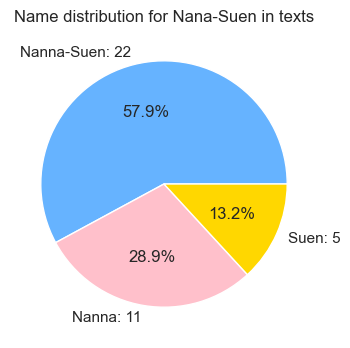

In [45]:
# Size plot 
fig = plt.figure(figsize=(4, 4))

# Create 3 wedges and labels
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',  # adds 1st wedge
                f'{data.index[1]}: {data.values[1]}',  # adds 2nd wedge
                f'{data.index[2]}: {data.values[2]}'], # adds 3rd wedge
        autopct='%1.1f%%', # display percent as a string
        colors=['#66b3ff', 'pink', 'gold']
        )

# Create title
plt.title('Name distribution for Nana-Suen in texts');

In [46]:
# Create pie chart for genre for `nana_texts`
# Get genre count to prepare pie
data = nana_texts['B_Category'].value_counts()
print('The god Nana-Suen by any of his three names occurs in {} :'.format(data))

The god Nana-Suen by any of his three names occurs in B_Category
Hymns addressed to deities                                      21
Royal praise poetry and hymns to deities on behalf of rulers    15
Narratives featuring deities                                     1
Other letters and letter-prayers                                 1
Name: count, dtype: int64 :


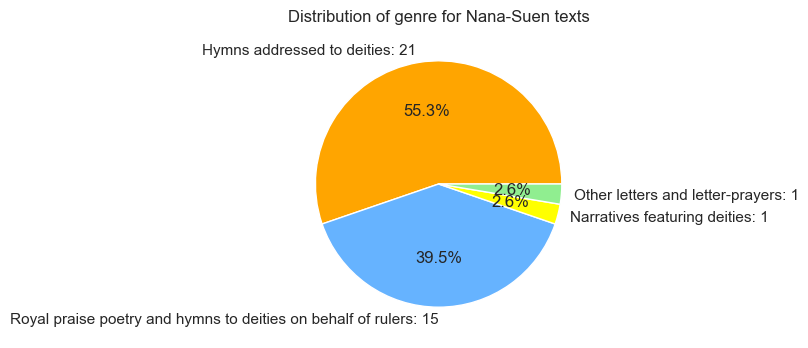

In [47]:
# Create pie with 4 wedges
fig = plt.figure(figsize=(4, 4))

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}',
                f'{data.index[2]}: {data.values[2]}',
                f'{data.index[3]}: {data.values[3]}'], # adds 4th wedge
        autopct='%1.1f%%',
        colors=['orange', '#66b3ff', 'yellow', 'lightgreen']
        )

plt.title('Distribution of genre for Nana-Suen texts');

### For Inana

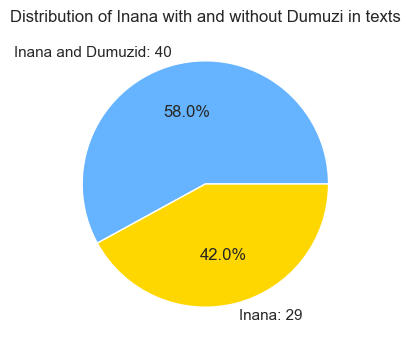

In [48]:
# Create pie chart for distribution of Inana/Dumuzi vs Inana in texts
inana_texts = df0[(df0['God']).isin(['Inana', 'Inana and Dumuzid'])].reset_index(drop=True)

fig = plt.figure(figsize=(4, 4))
data = inana_texts['God'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%',
        colors=['#66b3ff', 'gold']
        )

plt.title('Distribution of Inana with and without Dumuzi in texts');

In [49]:
# Create pie chart for genre for Inana texts
# Get genre count to prepare pie
data = inana_texts['B_Category'].value_counts()
print('Inana and Inana and Dumuzi occur in {}'.format(data))

Inana and Inana and Dumuzi occur in B_Category
Hymns addressed to deities                                      46
Royal praise poetry and hymns to deities on behalf of rulers    12
Narratives featuring deities                                    10
Hymns addressed to or concerning temples                         1
Name: count, dtype: int64


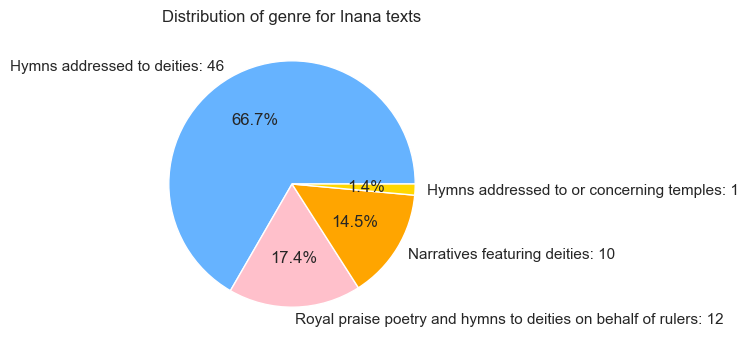

In [51]:
# Create pie with 4 wedges
fig = plt.figure(figsize=(4, 4))

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}',
                f'{data.index[2]}: {data.values[2]}',
                f'{data.index[3]}: {data.values[3]}'],
        autopct='%1.1f%%',
        colors=['#66b3ff', 'pink', 'orange', 'gold']
        )

plt.title('Distribution of genre for Inana texts');

### For Ninurta

In [52]:
# Create pie chart for genre for Ninurta texts
# Get genre count to prepare pie
ninurta_texts = df0[(df0['God']).isin(['Ninurta'])].reset_index(drop=True)
data = ninurta_texts['B_Category'].value_counts()
print('The god Ninurta occurs in {}'.format(data))

The god Ninurta occurs in B_Category
Hymns addressed to deities                                      13
Royal praise poetry and hymns to deities on behalf of rulers     8
Narratives featuring deities                                     4
Types of song                                                    1
Name: count, dtype: int64


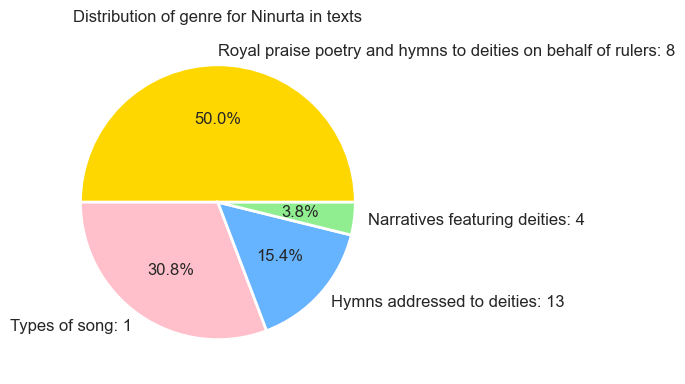

In [54]:
# Create pie with 4 wedges
fig = plt.figure(figsize=(8, 4))

plt.pie(data,
        labels=[f'{data.index[1]}: {data.values[1]}',
                f'{data.index[3]}: {data.values[3]}',
                f'{data.index[0]}: {data.values[0]}',
                f'{data.index[2]}: {data.values[2]}'],
        autopct='%1.1f%%',
wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, # adjust display of wedges
textprops={'size': 'medium'},        # adjust size of text within wedges for report
colors=['gold', 'pink', '#66b3ff', 'lightgreen']
        )
plt.title('Distribution of genre for Ninurta in texts', fontsize = 12)
plt.tight_layout();

### Plot number of texts per god

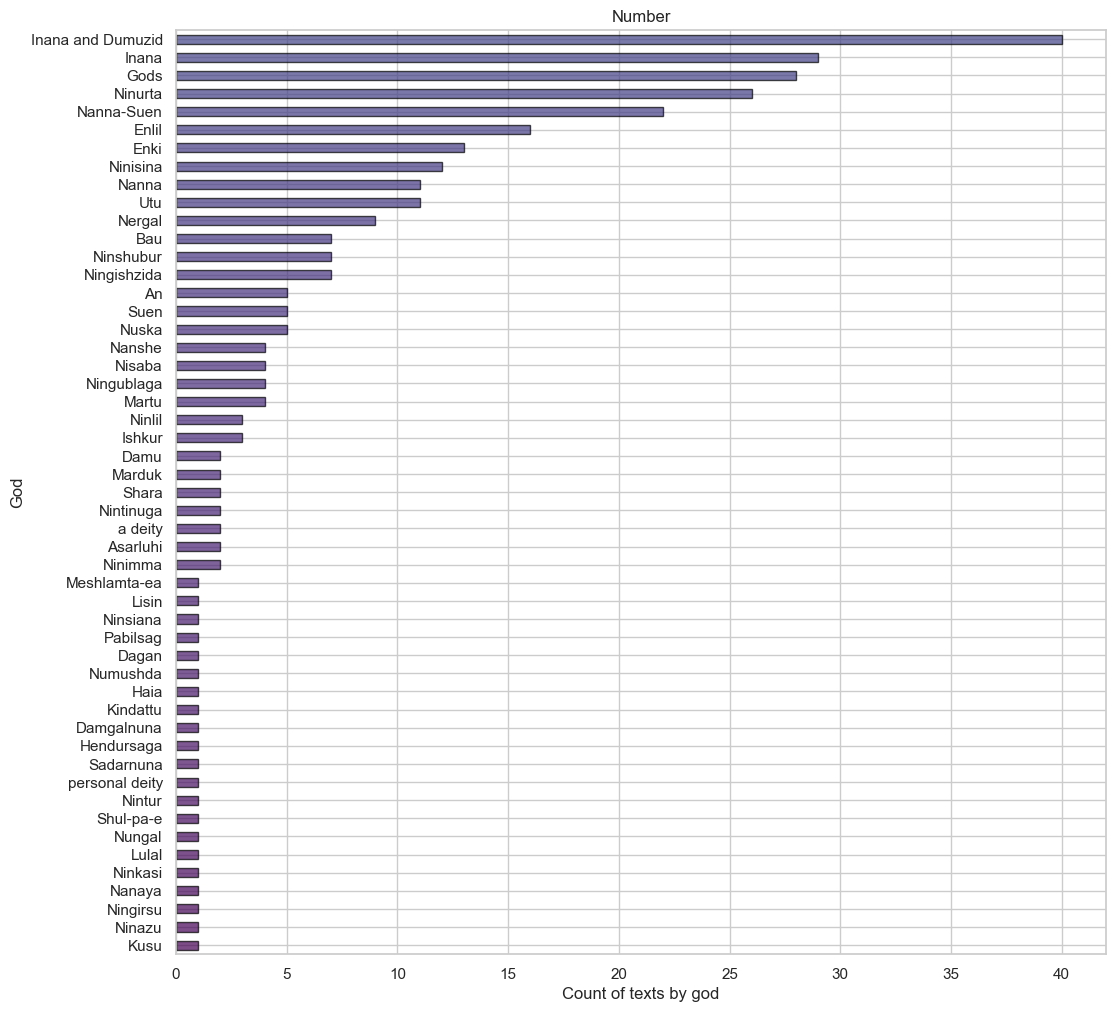

In [55]:
# Plot horizontal bar chart for number of texts per god
fig = plt.figure(figsize=(12, 12))

# Sort value counts
value_counts = df0['God'].value_counts().sort_values(ascending=True)
colors = plt.cm.viridis(range(len(value_counts))) # color map viridis color

value_counts.plot.barh(color=colors, 
                       edgecolor='black', 
                       alpha=0.7) # alpha sets transparency level

plt.xlabel('Count of texts by god')
plt.ylabel('God')
plt.title('Number')

plt.show()

### Plot number of texts per genre

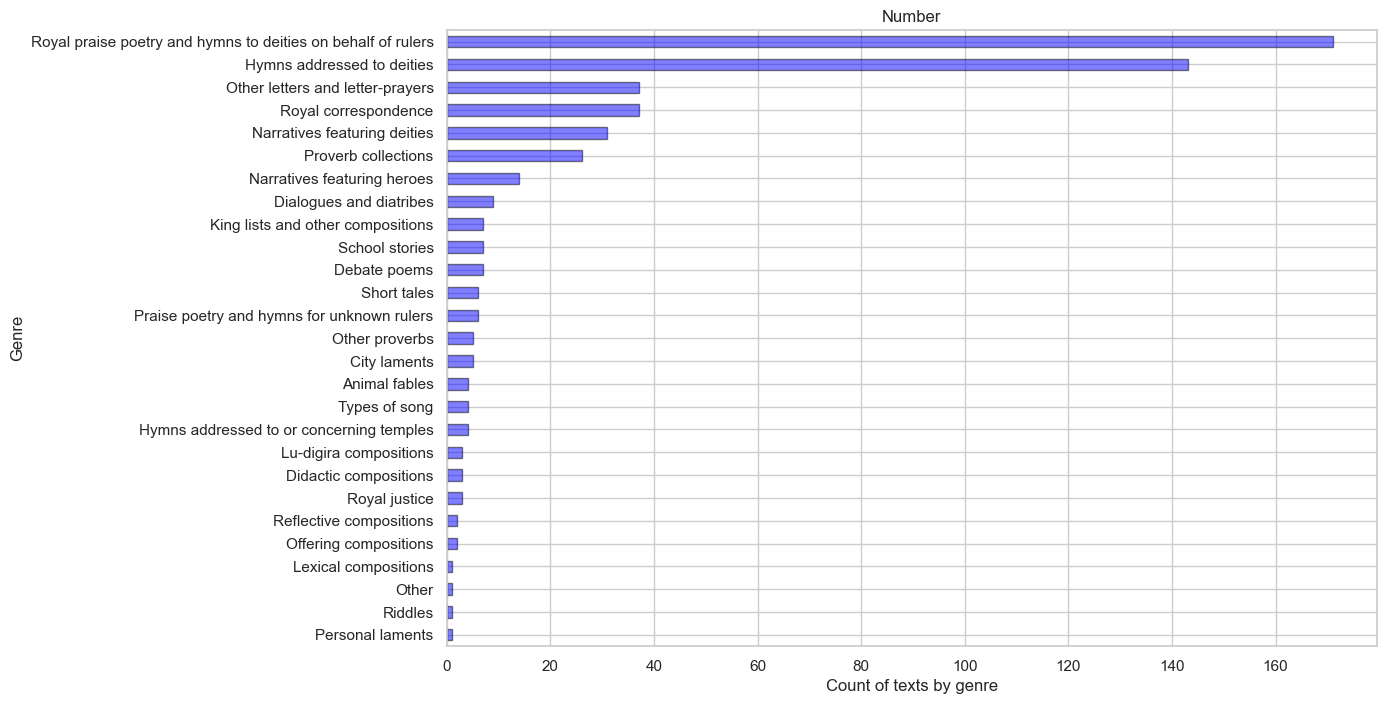

In [56]:
# Plot number of texts per genre
fig = plt.figure(figsize=(12, 8))
df0['B_Category'].value_counts().sort_values(ascending=True).plot.barh(color = 'blue', edgecolor = 'black', alpha=0.5)

plt.xlabel('Count of texts by genre')
plt.ylabel('Genre')
plt.title('Number')

plt.show()

### Plot examples of `B_Category` by god

#### `Narratives featuring deities`

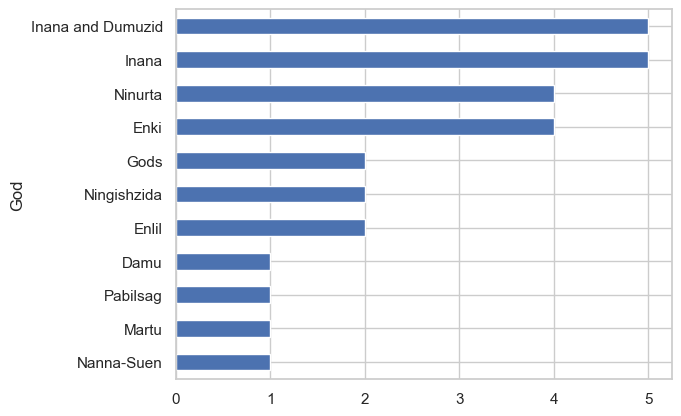

In [57]:
narratives = df0[(df0['B_Category'] == 'Narratives featuring deities')]
narratives['God'].value_counts().sort_values(ascending=True).plot.barh();

#### `Royal praise poetry and hymns to deities on behalf of rulers`

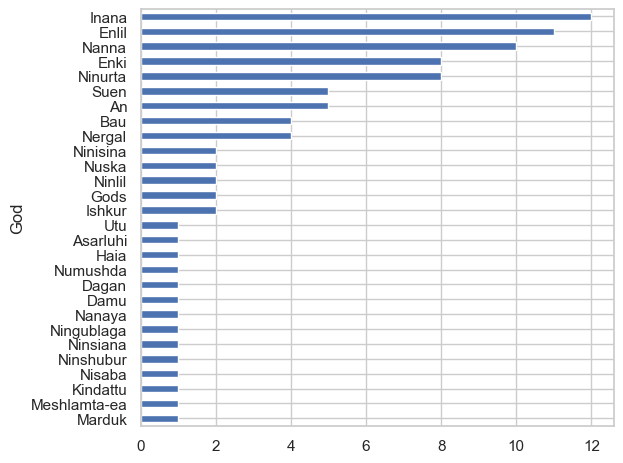

In [58]:
royal_praise = df0[(df0['B_Category'] == 'Royal praise poetry and hymns to deities on behalf of rulers')]
royal_praise['God'].value_counts().sort_values(ascending=True).plot.barh()

plt.tight_layout();

#### `Hymns addressed to deities`

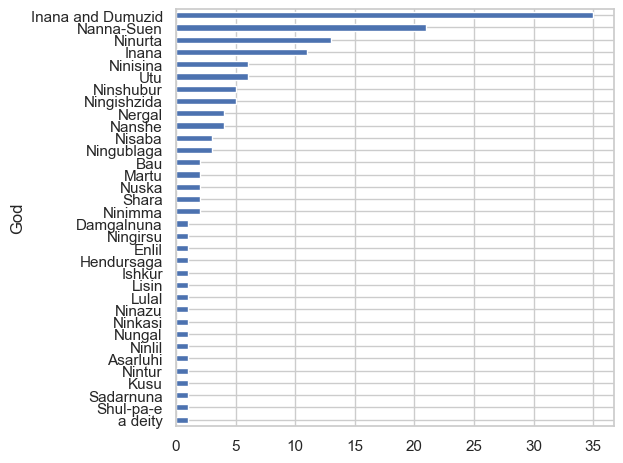

In [61]:
royal_praise = df0[(df0['B_Category'] == 'Hymns addressed to deities')]
royal_praise['God'].value_counts().sort_values(ascending=True).plot.barh()

plt.tight_layout();

### Plot example `B_Category` by Person

#### `Royal praise poetry and hymns to deities on behalf of rulers`

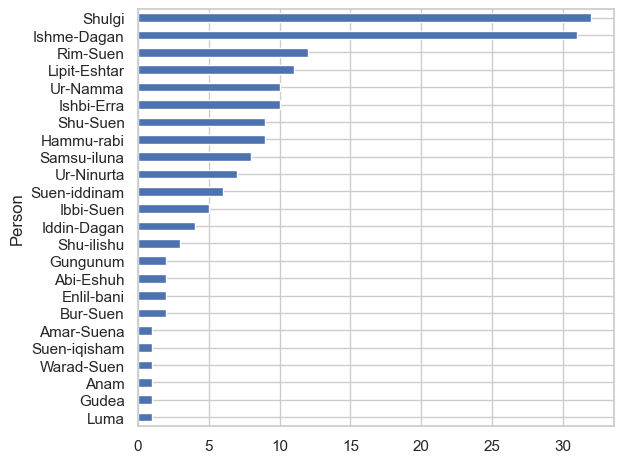

In [62]:
rp_person = df0[(df0['B_Category'] == 'Royal praise poetry and hymns to deities on behalf of rulers')]
rp_person['Person'].value_counts().sort_values(ascending=True).plot.barh()

plt.tight_layout();

# Basic EDA: Initial transformation for further analyses
* check for null rows
* check for duplicates
* sync columns names
* remove trailing white space from columns
* remove trailing white space from string entries
* investigate copyright only rows

In [63]:
# Check for nulls
df0[df0.Text.isnull()]

,A_Category,B_Category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Composition,Place,Text


In [64]:
# Check for duplicates
df0.duplicated().any() 

False

In [65]:
# Get columns names
df0.columns

Index(['A_Category', 'B_Category', 'Period', 'Dynasty', 'God', '2nd_god',
       'Other_divine', 'Person', 'Number', 'Composition', 'Place', 'Text'],
      dtype='object')

In [66]:
# Sync column names and change Composition to Title for clarity
df0 = df0.rename(columns={'A_Category': 'A_category', 'B_Category': 'B_category', 'Composition': 'Title'})
df0.columns

Index(['A_category', 'B_category', 'Period', 'Dynasty', 'God', '2nd_god',
       'Other_divine', 'Person', 'Number', 'Title', 'Place', 'Text'],
      dtype='object')

In [67]:
# Strip trailing spaces from column names
df0.columns = df0.columns.str.strip()
df0.head(2)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text
0,Ancient literary catalogues,NaN,Ur III,Ur III,NaN,NaN,NaN,NaN,0.1.1,Ur III catalogue from Nibru (N1),Nibru,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."
1,Ancient literary catalogues,NaN,Ur III,Ur III,NaN,NaN,NaN,NaN,0.1.2,Ur III catalogue at Yale (Y1),NaN,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."


In [68]:
# Strip trailing spaces from all string entries
df0 = df0.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df0.head(2)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text
0,Ancient literary catalogues,NaN,Ur III,Ur III,NaN,NaN,NaN,NaN,0.1.1,Ur III catalogue from Nibru (N1),Nibru,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."
1,Ancient literary catalogues,NaN,Ur III,Ur III,NaN,NaN,NaN,NaN,0.1.2,Ur III catalogue at Yale (Y1),NaN,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."


##### Note that some compositions have only copyrights and no text

In [69]:
# Check out a text
df0.Text.loc[65]

'1-12.   Enlil , the king of all the lands, entrusted  Utu -ḫeĝal , the mighty man, the king of  Unug , the king of the four quarters, the king whose orders cannot be countermanded, with wiping out the name of  Gutium , the fanged (?) snake of the mountains, who acted with violence against the gods, who carried off the kingship of  Sumer  to foreign lands, who filled  Sumer  with wickedness, who took away spouses from the married and took away children from parents, who made wickedness and violence normal in the Land. 13-16.  He went to his lady,  Inana , and prayed to her:  "My lady, lioness in the battle, who butts the foreign lands,  Enlil  has entrusted me with bringing back the kingship to  Sumer . May you be my help!" 17-23.  The enemy troops established themselves everywere.  Tirigan , the king of  Gutium  …… the mouths of the channels (?). Nobody came out of his city to face him; he already occupied both banks of the  Tigris . In the south, in  Sumer , he blocked the water from

##### Note that texts will need extensive cleaning

### Investigate copyright only rows
* some rows do not contain full text, but only a copyright holder

In [72]:
# Creat df of copyright only rows
copyright_rows = df0[(df0['Text']).isin([
    '© Copyright 2003, 2004, 2005, 2006 The ETCSL project, Faculty of Oriental Studies, University of Oxford Updated 2006-12-19 by JE', 
    '¬© Copyright 2003, 2004, 2005, 2006 The ETCSL project, Faculty of Oriental Studies, University of Oxford Updated 2006-12-19 by JE'])
]
copyright_rows.head()

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text
0,Ancient literary catalogues,NaN,Ur III,Ur III,NaN,NaN,NaN,NaN,0.1.1,Ur III catalogue from Nibru (N1),Nibru,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."
1,Ancient literary catalogues,NaN,Ur III,Ur III,NaN,NaN,NaN,NaN,0.1.2,Ur III catalogue at Yale (Y1),NaN,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."
2,Ancient literary catalogues,NaN,Old Babylonian,Old Babylonian,NaN,NaN,NaN,NaN,0.2.01,OB catalogue from Nibru (N2),Nibru,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."
3,Ancient literary catalogues,NaN,Old Babylonian,Old Babylonian,NaN,NaN,NaN,NaN,0.2.02,OB catalogue in the Louvre (L),NaN,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."
4,Ancient literary catalogues,NaN,Old Babylonian,Old Babylonian,NaN,NaN,NaN,NaN,0.2.03,OB catalogue from Urim (U1),Urim,"© Copyright 2003, 2004, 2005, 2006 The ETCSL p..."


In [73]:
# Get count of copy right rows
len(copyright_rows)

174

In [74]:
# Check out which Compositions(`Title`) are missing text (`Text`) 
copyright_rows_comp = copyright_rows['Title']
copyright_rows_comp

0                       Ur III catalogue from Nibru (N1)
1                          Ur III catalogue at Yale (Y1)
2                           OB catalogue from Nibru (N2)
3                         OB catalogue in the Louvre (L)
4                            OB catalogue from Urim (U1)
5                            OB catalogue from Urim (U2)
6                            OB catalogue from Urim (U3)
7                           OB catalogue from Nibru (N3)
8                 OB catalogue possibly from Zimbir (B1)
9                           OB catalogue from Nibru (N4)
10               OB catalogue at Andrews University (B4)
11                             OB catalogue at Yale (Y2)
12                          OB catalogue from Nibru (N6)
13            OB letter catalogue from Unug (W 17259 an)
14                     OB catalogue from Zimbir (Si 331)
35                                 The fields of Ninurta
37                             Ningishzida and Ninazimua
40                             

#### Get percentage of copyright_rows/missing texts by A_category

In [75]:
# Get counts for titles by A_category in full df
df0_count = df0.groupby('A_category')['Title'].count()
print(df0_count)

A_category
Ancient literary catalogues                                           15
Compositions with a historical background and royal praise poetry    189
Hymns and cult songs                                                 147
Literary letters, letter-prayers and laws                             77
Narrative and mythological compositions                               45
Other literature                                                      51
Proverbs and proverb collections                                      31
Name: Title, dtype: int64


In [76]:
# Get counts for title by A_category in copyright_rows
cr_count = copyright_rows.groupby('A_category')['Title'].count()
print(cr_count)

A_category
Ancient literary catalogues                                          15
Compositions with a historical background and royal praise poetry    51
Hymns and cult songs                                                 40
Literary letters, letter-prayers and laws                            34
Narrative and mythological compositions                               9
Other literature                                                     25
Name: Title, dtype: int64


In [77]:
# Get percentages
percentage = (copyright_rows.groupby('A_category')['Title'].count() /df0.groupby('A_category')['Title'].count()) * 100
print(percentage.round())

A_category
Ancient literary catalogues                                          100.0
Compositions with a historical background and royal praise poetry     27.0
Hymns and cult songs                                                  27.0
Literary letters, letter-prayers and laws                             44.0
Narrative and mythological compositions                               20.0
Other literature                                                      49.0
Proverbs and proverb collections                                       NaN
Name: Title, dtype: float64


#### Results
174 out of 555 compositions are missing texts and have only copyrights

* `Ancient literary catalogues` contains no translations out of 15 entries
* `Narrative and mythological compositions` is missing 9 (20%) translations  
* `Compositions with a historical background and royal praise poetry` is missing 51 (27%) translations 
* `Literary letters, letter-prayers and laws` is missing 34 (44%) translations 
* `Hymns and cult songs` is missing 40 (27%) translations 
* `Other literature` is missing 25 (49%) translations  
* `Proverbs and proverb collections` is missing no translations out of 31

##### Next step: Keep only rows with text (not simply a copyright)

### Drop 174 copyright only rows
* having rows without text will compromise clustering and other models

In [78]:
# Make copy of df
df_drop_cr = df0.copy()
df_drop_cr.shape

(555, 12)

In [79]:
# Create non-copyright df
# Drop rows
df_drop_cr = df0[~(df0['Text']).isin([
    '© Copyright 2003, 2004, 2005, 2006 The ETCSL project, Faculty of Oriental Studies, University of Oxford Updated 2006-12-19 by JE', 
    '¬© Copyright 2003, 2004, 2005, 2006 The ETCSL project, Faculty of Oriental Studies, University of Oxford Updated 2006-12-19 by JE'])
].reset_index(drop=True)
df_drop_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   A_category    381 non-null    object
 1   B_category    381 non-null    object
 2   Period        151 non-null    object
 3   Dynasty       151 non-null    object
 4   God           238 non-null    object
 5   2nd_god       10 non-null     object
 6   Other_divine  28 non-null     object
 7   Person        184 non-null    object
 8   Number        381 non-null    object
 9   Title         381 non-null    object
 10  Place         28 non-null     object
 11  Text          381 non-null    object
dtypes: object(12)
memory usage: 35.8+ KB


In [80]:
# Check that it worked correctly
555-174

381

In [81]:
# Check for empty rows
# Focus on Text
df_drop_cr.isnull().sum()

A_category        0
B_category        0
Period          230
Dynasty         230
God             143
2nd_god         371
Other_divine    353
Person          197
Number            0
Title             0
Place           353
Text              0
dtype: int64

### Some updated statistics

In [82]:
print('This catalog has {} observations with {} features: \n'.format(df_drop_cr.shape[0],df_drop_cr.shape[1]), ', '.join(df_drop_cr.columns))

print('\nIt contains {} umbrella categories: \n{}\n'.format(len(df_drop_cr.A_category.unique()), ', '.join(df_drop_cr.A_category.unique())
                                                                                               ))

print('It contains {} genres such as: \n{} \n'.format(len(df_drop_cr.B_category.dropna().unique()), 
                                                        ', '.join(df_drop_cr.B_category.dropna().unique()[0:5]) 
                                                         ))

print('The texts feature {} different gods such as: \n{} \n'.format(len(df_drop_cr.God.dropna().unique()), 
                                                                      ', '.join(df_drop_cr.God.dropna().unique()[0:5]) 
                                                                      ))

print('The texts feature {} different legendary and royal persons such as: \n{} \n'.format(len(df_drop_cr.Person.dropna().unique()), 
                                                                      ', '.join(df_drop_cr.Person.dropna().unique()[0:5]) 
                                                                      ))

print('{} compositions are attributed to, or mention, a place. These are: \n{}'.format(len(df_drop_cr.Place.dropna().unique()), 
                                                                                      ', '.join(df_drop_cr.Place.dropna().unique())
                                                                ))


This catalog has 381 observations with 12 features: 
 A_category, B_category, Period, Dynasty, God, 2nd_god, Other_divine, Person, Number, Title, Place, Text

It contains 6 umbrella categories: 
Narrative and mythological compositions, Compositions with a historical background and royal praise poetry, Literary letters, letter-prayers and laws, Hymns and cult songs, Other literature, Proverbs and proverb collections

It contains 25 genres such as: 
Narratives featuring deities, Narratives featuring heroes, King lists and other compositions, City laments, Royal praise poetry and hymns to deities on behalf of rulers 

The texts feature 46 different gods such as: 
Enki, Enlil, Inana, Inana and Dumuzid, Nanna-Suen 

The texts feature 45 different legendary and royal persons such as: 
Shu-kale-tuda, Geshtinana, Bilulu, Gilgamesh, Lugalbanda 

15 compositions are attributed to, or mention, a place. These are: 
Nibru, Ebih, Netherworld, Sumer, Aratta, Lagash, Tummal, Agade, Urim, Unug, Eridug,

#### Get new value counts for categorical `B_category` 

In [83]:
# Get value counts for categorical 'B_category' to establish count/percentage of texts in each genre
df_drop_cr['B_category'].value_counts()

B_category
Royal praise poetry and hymns to deities on behalf of rulers    122
Hymns addressed to deities                                      104
Narratives featuring deities                                     26
Proverb collections                                              26
Royal correspondence                                             26
Other letters and letter-prayers                                 17
Narratives featuring heroes                                      10
King lists and other compositions                                 7
Debate poems                                                      6
Other proverbs                                                    5
City laments                                                      5
Praise poetry and hymns for unknown rulers                        4
Hymns addressed to or concerning temples                          3
Lu-digira compositions                                            3
Types of song                        

In [84]:
df_drop_cr['B_category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

B_category
Royal praise poetry and hymns to deities on behalf of rulers    32.0%
Hymns addressed to deities                                      27.3%
Narratives featuring deities                                     6.8%
Proverb collections                                              6.8%
Royal correspondence                                             6.8%
Other letters and letter-prayers                                 4.5%
Narratives featuring heroes                                      2.6%
King lists and other compositions                                1.8%
Debate poems                                                     1.6%
Other proverbs                                                   1.3%
City laments                                                     1.3%
Praise poetry and hymns for unknown rulers                       1.0%
Hymns addressed to or concerning temples                         0.8%
Lu-digira compositions                                           0.8%
Types of 

## Save cleaned df

In [85]:
# Save final ‘sentiment’ to a CSV 
df_drop_cr.to_csv('all_texts_cleaned_1.csv', index=False)
df0 = pd.read_csv('all_texts_cleaned_1.csv').round(3)
df0.head(3)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ..."
2,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,NaN,NaN,NaN,1.1.3,Enki and the world order,NaN,"1-16. Grandiloquent lord of heaven and earth,..."


In [ ]:
df0.info()